In [3]:
#import all the modeules we've used before

import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import rdkit
# Render the figure in a notebook:
%matplotlib inline  

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
Nan0_xtest = pd.read_csv('X_testNan0scaled_Desc.csv', index_col=0)
Nan0_xtrain = pd.read_csv('X_trainNan0scaled_Desc.csv', index_col=0)
Nan0_xval = pd.read_csv('X_valNan0scaled_Desc.csv', index_col=0)

In [5]:

Nan0_ytest = pd.read_csv('Y_testNan0.csv', index_col=0)
Nan0_ytrain = pd.read_csv('Y_trainNan0.csv', index_col=0)
Nan0_yval = pd.read_csv('Y_valNan0.csv', index_col=0)

In [6]:
num_rows_with_nan = Nan0_xtrain.isna().any(axis=1).sum()
print(num_rows_with_nan)
### Nan exist in desc. dataframe, need to be removed

100


In [7]:
# Nan0_xtest.isna().stack()[lambda x: x].index
# Nan0_xtest.index[Nan0_xtest.isna().any(axis=1)]

# rows, cols = np.where(Nan0_xtest.isna())

# for r, c in zip(rows, cols):
#     print(f"NaN at row={Nan0_xtest.index[r]}, column={Nan0_xtest.columns[c]}")



In [8]:
mask = Nan0_xtrain.notna().all(axis=1)

Nan0_xtrain_clean = Nan0_xtrain[mask]
Nan0_ytrain_clean = Nan0_ytrain[mask]

mask2 = Nan0_xtest.notna().all(axis=1)

Nan0_xtest_clean = Nan0_xtest[mask2]
Nan0_ytest_clean = Nan0_ytest[mask2]

mask3 = Nan0_xval.notna().all(axis=1)

Nan0_xval_clean = Nan0_xval[mask3]
Nan0_yval_clean = Nan0_yval[mask3]

In [9]:
num_rows_with_nan_clean = Nan0_xtrain_clean.isna().any(axis=1).sum()
print(num_rows_with_nan_clean)

0


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

In [10]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
import torch

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
# Render the figure in a notebook:
%matplotlib inline  

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

from sklearn import metrics

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.nn.functional as F

from torchmetrics.classification import Accuracy
from torchmetrics.classification import Recall
from torchmetrics import R2Score
from torchmetrics import MeanAbsoluteError

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
RFC = RandomForestClassifier(n_estimators=100, criterion='gini')
RFC_model = RFC.fit(Nan0_xtrain_clean, Nan0_ytrain_clean)

def model_metrics(x_data, y_data, model):
    model_prediction = model.predict(x_data)
    accuracy_prediciton = metrics.accuracy_score(y_data, model_prediction)
    print('accuracy:', accuracy_prediciton)

c:\Users\dy25544\.conda\envs\chem-ml-env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [24]:
model_metrics(Nan0_xtrain_clean, Nan0_ytrain_clean, RFC_model)
model_metrics(Nan0_xval_clean, Nan0_yval_clean, RFC_model)
model_metrics(Nan0_xtest_clean, Nan0_ytest_clean, RFC_model)

accuracy: 0.9990695943431336
accuracy: 0.7491319444444444
accuracy: 0.7454387489139879


In [25]:
def get_confusion_matrix(x_data, y_data, model, train_test_val_type):
    model_prediction = model.predict(x_data)
    ConfusionMatrixDisplay.from_predictions(y_data, model_prediction)
    plt.title('Confusion Matrix for {:} data'.format(train_test_val_type));

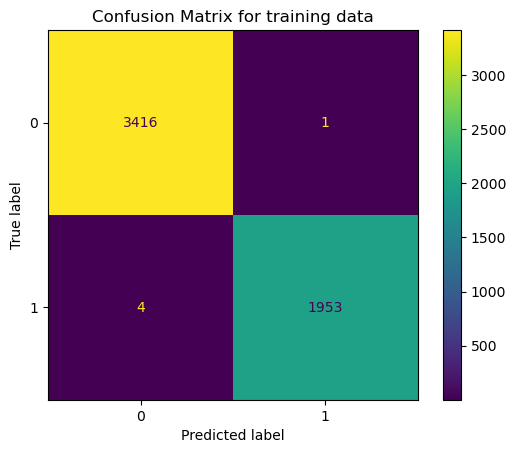

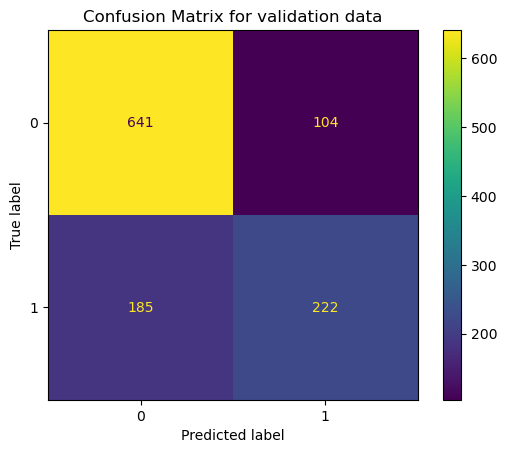

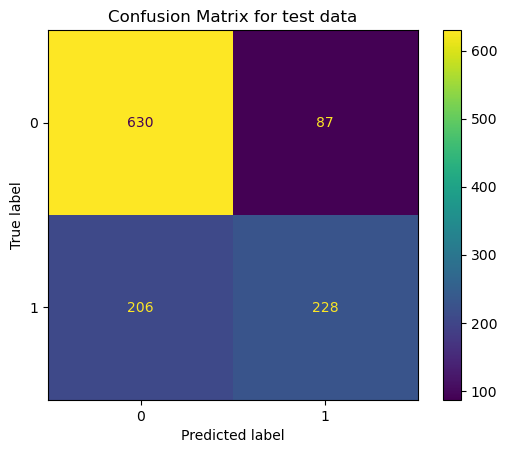

In [27]:
get_confusion_matrix(Nan0_xtrain_clean,Nan0_ytrain_clean,RFC_model, 'training') 
get_confusion_matrix(Nan0_xval_clean, Nan0_yval_clean, RFC_model, 'validation') 
get_confusion_matrix( Nan0_xtest_clean, Nan0_ytest_clean, RFC_model, 'test')

Hyperparameter tuning

In [17]:
np.linspace(2, 10, 5, dtype=int)

array([ 2,  4,  6,  8, 10])

In [28]:
Nan0_ytrain_array =Nan0_ytrain_clean.to_numpy().flatten()
Nan0_ytrain_array

array([0, 1, 0, ..., 0, 1, 1], shape=(5374,))

In [30]:
random_search_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(
    random_state=0,
    n_jobs=-1,          # IMPORTANT: use all cores
    class_weight='balanced'  # VERY important for toxicity
)
random_search_RFC = RandomForestClassifier(random_state=0)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_search_params,
    n_iter=20,
    cv=5,
    scoring='balanced_accuracy',
    verbose=2,
    random_state=0,
    n_jobs=-1
)

random_search.fit(Nan0_xtrain_clean,Nan0_ytrain_array)

best_RF = random_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_RF.predict(Nan0_xtest_clean)
bacc = metrics.balanced_accuracy_score(Nan0_ytest_clean, y_pred)
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")
print(f"bacc: {bacc}")



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 300, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30}
bacc: 0.7159182204397483


In [31]:
from sklearn.model_selection import  GridSearchCV

In [34]:
grid_search_params = {
    'n_estimators': [500],
    'criterion': ['gini'],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2']
}
grid_search_RFC = RandomForestClassifier(
    random_state=0,
    n_jobs=-1,
    class_weight='balanced'
)

grid_search = GridSearchCV(estimator=grid_search_RFC, param_grid=grid_search_params, cv=5, n_jobs=-1, verbose=2, scoring='balanced_accuracy')
grid_search.fit(Nan0_xtrain_clean, Nan0_ytrain_array)
best_RF_grid = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_RF_grid.predict(Nan0_xtest_clean)
bacc = metrics.balanced_accuracy_score(Nan0_ytest_clean, y_pred)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"bacc: {bacc}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
bacc: 0.7070663735868217


In [35]:
#should be looking at val stats not test stats!!!
y_pred_train = best_RF_grid.predict(Nan0_xtrain_clean)
y_pred_val = best_RF_grid.predict(Nan0_xval_clean)
bacc_train = metrics.balanced_accuracy_score(Nan0_ytrain_clean ,y_pred_train)
bacc_val = metrics.balanced_accuracy_score(Nan0_yval_clean, y_pred_val)
print(f"bacc train: {bacc_train}")
print(f"bacc val: {bacc_val}")

bacc train: 0.9915246126516715
bacc val: 0.7123245881635143


c:\Users\dy25544\.conda\envs\chem-ml-env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy: 0.9918124302195758
accuracy: 0.765625


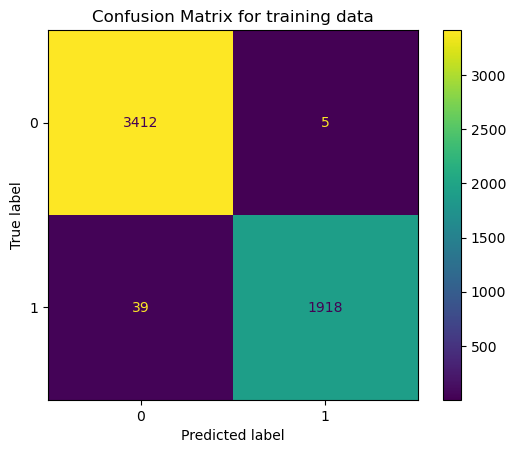

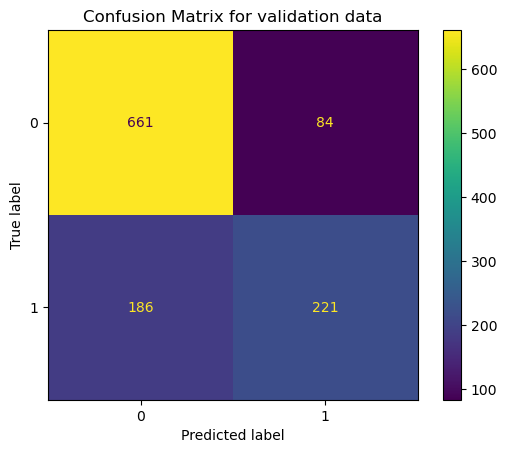

In [36]:
RFC_optimised = RandomForestClassifier(n_estimators=450, criterion='gini', max_depth=27, min_samples_split=5, min_samples_leaf=1, max_features='log2')
RFC_optimised_model = RFC_optimised.fit(Nan0_xtrain_clean, Nan0_ytrain_clean)

model_metrics(Nan0_xtrain_clean,Nan0_ytrain_clean, RFC_optimised_model)
model_metrics(Nan0_xval_clean,Nan0_yval_clean, RFC_optimised_model)

get_confusion_matrix(Nan0_xtrain_clean,Nan0_ytrain_clean,RFC_optimised_model, 'training') 
get_confusion_matrix(Nan0_xval_clean,Nan0_yval_clean,RFC_optimised_model, 'validation') 


In [37]:
from sklearn import metrics
def get_model_metrics(fitted_model, Nan0_xtrain, Nan0_xval_clean, y_train, y_val):
    pred_X_train = fitted_model.predict(Nan0_xtrain_clean)
    pred_X_val = fitted_model.predict(Nan0_xval_clean)
    train_bal_acc = metrics.balanced_accuracy_score(Nan0_ytrain_clean, pred_X_train)
    

    val_bal_acc = metrics.balanced_accuracy_score(y_val, pred_X_val)
    val_bal_acc = metrics.balanced_accuracy_score(Nan0_yval_clean, pred_X_val)

    train_recall = metrics.recall_score(Nan0_ytrain_clean, pred_X_train)
    val_recall = metrics.recall_score(Nan0_yval_clean, pred_X_val)

    train_precision = metrics.precision_score(Nan0_ytrain_clean, pred_X_train)
    val_precision = metrics.precision_score(Nan0_yval_clean, pred_X_val)
    
    train_f1 = metrics.f1_score(Nan0_ytrain_clean, pred_X_train)
    val_f1 = metrics.f1_score(Nan0_yval_clean, pred_X_val)

    metric_list = [train_bal_acc, train_recall, train_precision, train_f1, val_bal_acc, val_recall, val_precision, val_f1]
    print(metric_list)
get_model_metrics(RFC_optimised_model, Nan0_xtrain_clean, Nan0_xval_clean, Nan0_ytrain_clean, Nan0_yval_clean)

[0.9893041330962788, 0.9800715380684721, 0.9973998959958398, 0.988659793814433, 0.715122932572597, 0.542997542997543, 0.7245901639344262, 0.6207865168539326]


Featurization

In [39]:
RFC_importances_impurity = pd.DataFrame(RFC_optimised_model.feature_importances_)
RFC_importances_impurity['feature'] =Nan0_xtrain_clean.columns
RFC_importances_impurity

,0,feature
0,0.008994,MaxAbsEStateIndex
1,0.008892,MaxEStateIndex
2,0.009671,MinAbsEStateIndex
3,0.009838,MinEStateIndex
4,0.009487,qed
...,...,...
212,0.000380,fr_thiazole
213,0.000086,fr_thiocyan
214,0.000214,fr_thiophene
215,0.001706,fr_unbrch_alkane


In [40]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
RFC_importances_permutation = RFC_optimised_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC_optimised_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
RFC_importances_permutation = pd.DataFrame(RFC_importances_permutation)
RFC_importances_permutation['feature'] = Nan0_xtrain_clean.columns
RFC_importances_permutation

Elapsed time to compute the importances: 0.025 seconds


,0,feature
0,0.008994,MaxAbsEStateIndex
1,0.008892,MaxEStateIndex
2,0.009671,MinAbsEStateIndex
3,0.009838,MinEStateIndex
4,0.009487,qed
...,...,...
212,0.000380,fr_thiazole
213,0.000086,fr_thiocyan
214,0.000214,fr_thiophene
215,0.001706,fr_unbrch_alkane


TOP 10 features

In [45]:
def get_feature_importance(model_fitted, top_n=10, df_Nan0_xtrain_clean=Nan0_xtrain_clean):
    """Returns the feature importances as a dataframe"""
    importances_permutation = model_fitted.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model_fitted.estimators_], axis=0)
    df_importances_permutation = pd.DataFrame(importances_permutation)
    df_importances_permutation['feature'] = df_Nan0_xtrain_clean.columns

    df_top_n_importances_permutation = df_importances_permutation.nlargest(top_n, 0)
    print(df_top_n_importances_permutation)

    df_importances_permutation_FG = df_importances_permutation[df_importances_permutation['feature'].str.contains("fr_")] #new df containing only the features called fr_, i.e. the functional groups
    df_importances_permutation_FG_top_10 = df_importances_permutation_FG.nlargest(top_n,0)
    print(df_importances_permutation_FG_top_10)

In [46]:
top_10_RFC_importances_permutation = RFC_importances_permutation.nlargest(10, 0)
top_10_RFC_importances_permutation

,0,feature
130,0.020428,MolLogP
22,0.014900,BCUT2D_LOGPHI
28,0.014599,BertzCT
75,0.013669,SlogP_VSA2
105,0.012911,FractionCSP3
46,0.012861,LabuteASA
7,0.012756,HeavyAtomMolWt
23,0.011881,BCUT2D_LOGPLOW
68,0.011843,SMR_VSA7
131,0.011692,MolMR


In [47]:
top_10_RFC_importances_impurity = RFC_importances_impurity.nlargest(10,0)
top_10_RFC_importances_impurity

,0,feature
130,0.020428,MolLogP
22,0.014900,BCUT2D_LOGPHI
28,0.014599,BertzCT
75,0.013669,SlogP_VSA2
105,0.012911,FractionCSP3
46,0.012861,LabuteASA
7,0.012756,HeavyAtomMolWt
23,0.011881,BCUT2D_LOGPLOW
68,0.011843,SMR_VSA7
131,0.011692,MolMR


WORSE FINCTIONAL GROUPS

In [48]:
RFC_importance_perm_FG = RFC_importances_permutation[RFC_importances_permutation['feature'].str.contains("fr_")] #new df containing only the features called fr_, i.e. the functional groups
RFC_importance_perm_FG_top_10 = RFC_importance_perm_FG.nlargest(20,0)
RFC_importance_perm_FG_top_10

,0,feature
197,0.004095,fr_phenol
168,0.003941,fr_bicyclic
166,0.003938,fr_benzene
198,0.003827,fr_phenol_noOrthoHbond
158,0.003712,fr_allylic_oxid
139,0.003222,fr_Ar_OH
147,0.002896,fr_NH0
161,0.002846,fr_aniline
176,0.002796,fr_halogen
142,0.002262,fr_C_O
